In [3]:
from ERA5.ERA5_processor import era5_processing
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib
from datetime import datetime
import dask
import xarray as xr
import time
import numpy as np
import metpy
from metpy.units import units

# Loading data

In [5]:
path = '/data/keeling/a/mailes2/Fall2024_Projects/IDPH/'

### Temperature

In [6]:
era5_2004_2024_t2m = xr.open_dataarray(path+'ERA5_t2m_hourly_2004_2024_IL_02_24_25.nc')
era5_2004_2024_t2m.load()

<xarray.DataArray '2m_temperature' (time: 184104, lat: 29, lon: 27)> Size: 577MB
array([[[266.6009 , 267.32217, 268.51215, ..., 274.94028, 274.4525 ,
         273.9854 ],
        [267.21573, 267.43817, 268.4772 , ..., 275.39148, 275.39465,
         275.04355],
        [267.72733, 267.9688 , 268.2532 , ..., 275.77277, 275.79977,
         275.5138 ],
        ...,
        [281.92285, 281.7719 , 281.532  , ..., 281.62576, 281.49548,
         281.1507 ],
        [282.38516, 282.26443, 282.0277 , ..., 281.6337 , 281.40808,
         281.0538 ],
        [282.62347, 282.50433, 282.36133, ..., 281.0395 , 280.8266 ,
         280.98865]],

       [[266.84396, 267.4016 , 267.72733, ..., 274.68765, 274.3699 ,
         274.23645],
        [267.4588 , 267.21255, 267.28247, ..., 275.18176, 275.23895,
         275.15   ],
        [268.053  , 267.87347, 267.52713, ..., 275.59802, 275.6679 ,
         275.428  ],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], shape=(184104, 29, 27), dtype=float32)
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

In [4]:
t2m_C = era5_2004_2024_t2m - 273.15

### Wind

In [6]:
vwind = xr.open_dataarray(path+'ERA5_vwind_hourly_2004_2024_IL_02_27_25.nc')
vwind

<xarray.DataArray '10m_v_component_of_wind' (time: 184104, lat: 29, lon: 27)>
[144153432 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 43.25 43.0 42.75 42.5 42.25 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 267.2 267.5 267.8 268.0 ... 273.0 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2004-01-01 ... 2024-12-31T23:00:00
Attributes:
    long_name:   10 metre V wind component
    short_name:  v10
    units:       m s**-1

In [7]:
uwind = xr.open_dataarray(path+'ERA5_uwind_hourly_2004_2024_IL_02_27_25.nc')
uwind

<xarray.DataArray '10m_u_component_of_wind' (time: 184104, lat: 29, lon: 27)>
[144153432 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 43.25 43.0 42.75 42.5 42.25 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 267.2 267.5 267.8 268.0 ... 273.0 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2004-01-01 ... 2024-12-31T23:00:00
Attributes:
    long_name:   10 metre U wind component
    short_name:  u10
    units:       m s**-1

In [8]:
def wind_tot(uwind, vwind):
    wind_mag = np.sqrt(vwind**2 + uwind**2)
    wind_dir = np.arctan2(vwind/wind_mag, uwind/wind_mag)
    wind_dir = wind_dir * 180/np.pi
    
    return wind_mag, wind_dir

In [9]:
wind_mag, wind_dir = wind_tot(uwind, vwind)

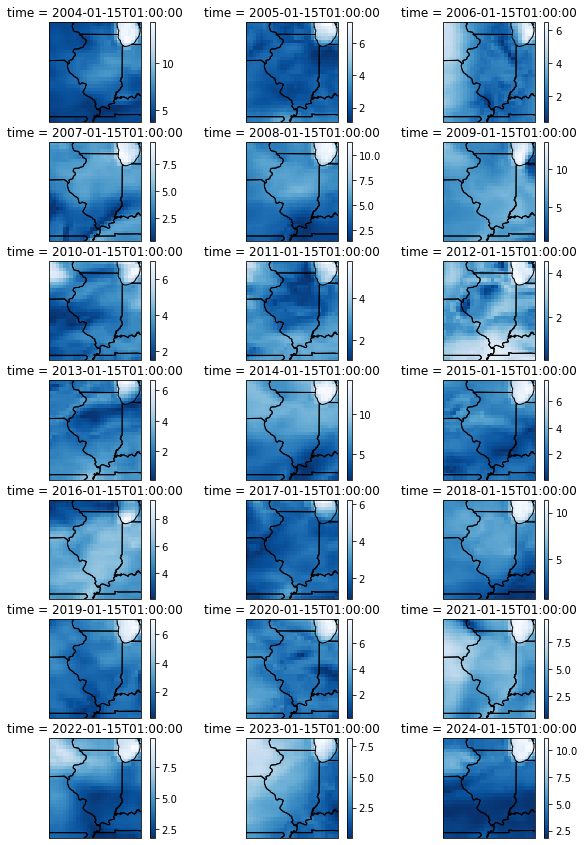

In [10]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    wind_mag.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

In [2]:
wind_mag = era5_processing('sfcWind', 2004, 2024, 'analysis_ready')

Done


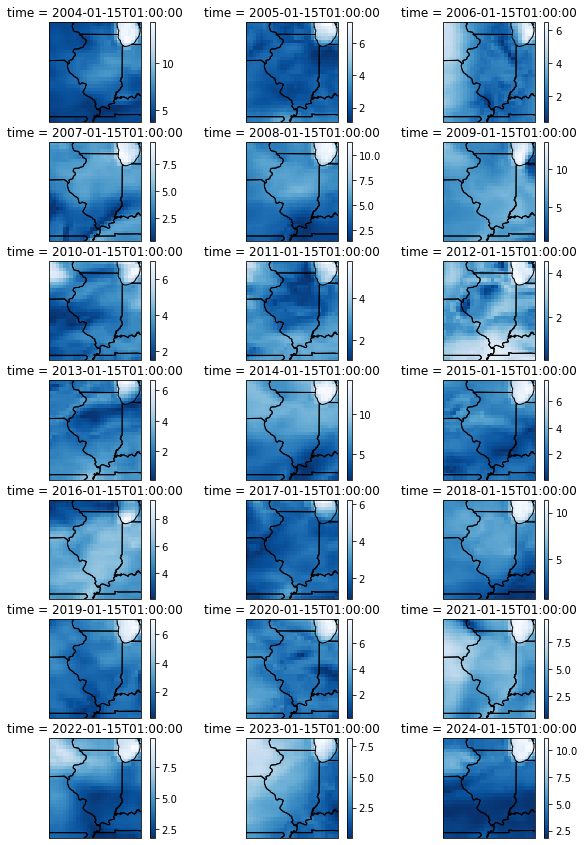

In [3]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    wind_mag.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Dewpoint

In [2]:
dewpoint = era5_processing('2m_dewpoint_temperature', 2004, 2024, 'analysis_ready')
dewpoint

Done


<xarray.DataArray '2m_dewpoint_temperature' (time: 184104, lat: 29, lon: 27)>
dask.array<where, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 43.25 43.0 42.75 42.5 42.25 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 267.2 267.5 267.8 268.0 ... 273.0 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2004-01-01 ... 2024-12-31T23:00:00
Attributes:
    long_name:   2 metre dewpoint temperature
    short_name:  d2m
    units:       K

In [3]:
dewpoint_C = dewpoint - 273.15

### Relative Humidity

In [7]:
RH = xr.open_dataarray(path+'ERA5_calc_RH_2004_2024_IL_02_21_25.nc')
RH

<xarray.DataArray (time: 184104, lat: 29, lon: 27)> Size: 577MB
[144153432 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

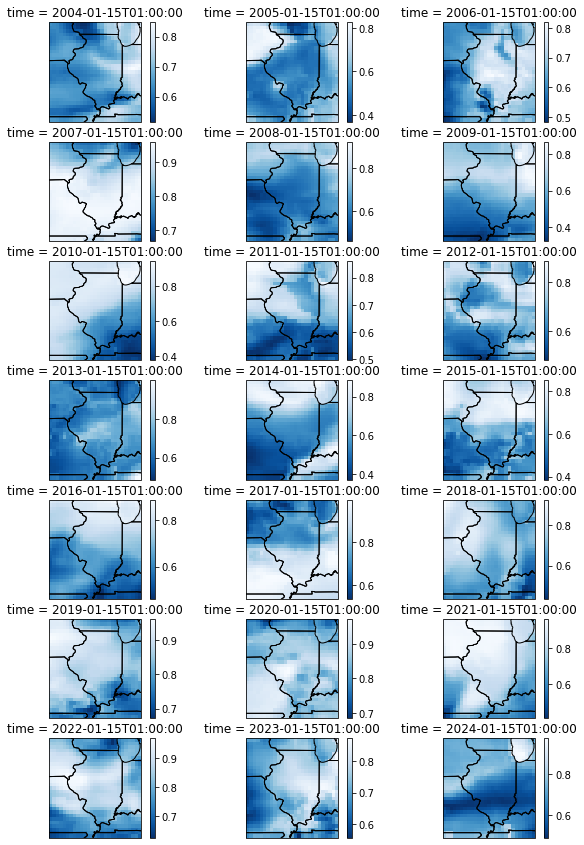

In [6]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    RH.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

In [3]:
rel_hum = era5_processing('relative_humidity', 2004, 2024, 'analysis_ready')
rel_hum

Done


<xarray.DataArray 'truediv-96619be1b1ec2080c57f3ef0beff8781' (time: 184104,
                                                              lat: 29, lon: 27)>
<Quantity(dask.array<truediv, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>, 'dimensionless')>
Coordinates:
  * lat      (lat) float32 43.25 43.0 42.75 42.5 42.25 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 267.2 267.5 267.8 268.0 ... 273.0 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2004-01-01 ... 2024-12-31T23:00:00

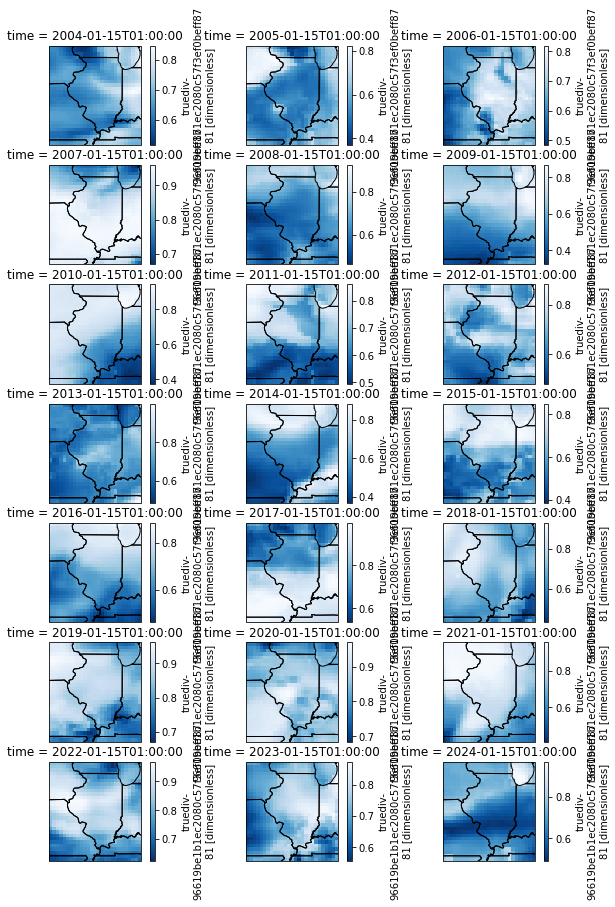

In [4]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    rel_hum.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Vapor Pressure

In [4]:
def vapor_pressure(dewpoint):
    """
    https://www.weather.gov/epz/wxcalc_vaporpressure
    
    Returns vapor pressure in units of hPa/mb
    """
    e = 6.11 * 10**((7.5*dewpoint)/(237.3+dewpoint))
    return e

In [5]:
vapor_p = vapor_pressure(dewpoint_C)

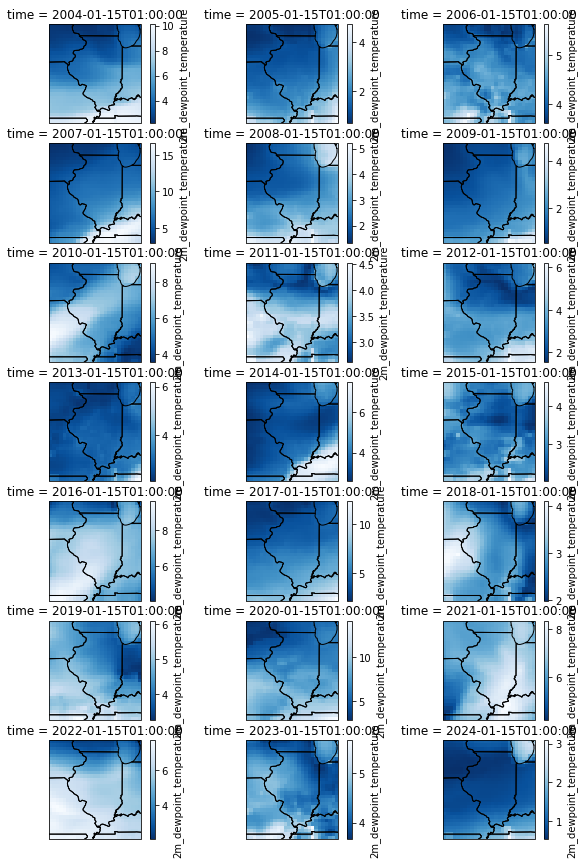

In [6]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    vapor_p.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

In [2]:
vapor_p = era5_processing('vapor_pressure', 2004, 2024, 'analysis_ready')

Done


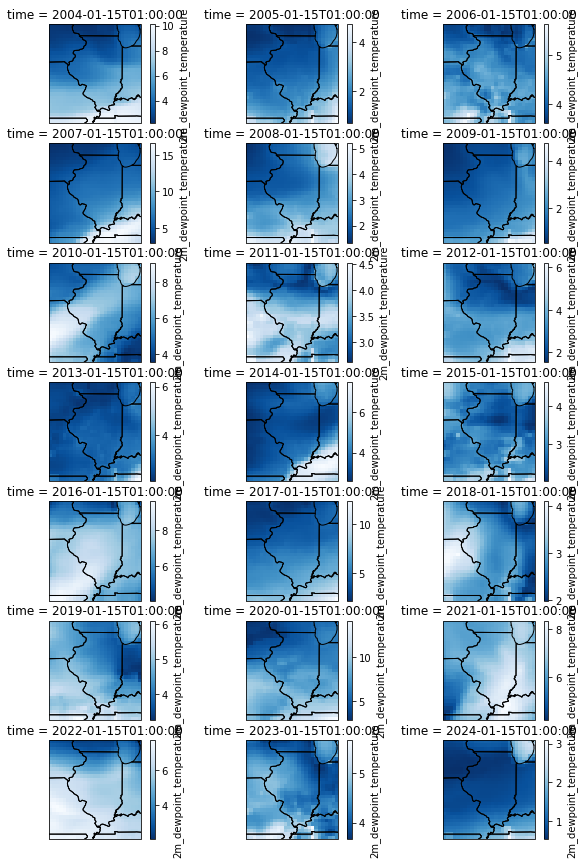

In [3]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    vapor_p.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

# Apparent Temperature

In [20]:
def apparent_temperature(t2m, wind, vp):
    """
    https://confluence.ecmwf.int/display/FCST/New+parameters%3A+heat+and+cold+indices%2C+mean+radiant+temperature+and+globe+temperature
    
    Inputs:
        t2m - (DataArray) 2m temperature (C)
        wind - (DataArray) 10 m wind speed (m/s)
        vp - (DataArray) 2m vapor pressure (hPa)
    Outputs: 
        apparent_temperature - (DataArray) Apparent temperature (in C)
    """
    
    apparent_temperature = t2m + 0.33*vp - 0.7*wind - 4.0
    
    return apparent_temperature

In [21]:
at = apparent_temperature(t2m_C, wind_mag, vapor_p)
at

<xarray.DataArray (time: 184104, lat: 29, lon: 27)>
array([[[-11.098937 , -10.251236 ,  -9.00216  , ...,  -6.9553776,
          -6.243274 ,  -4.904232 ],
        [-10.4677305, -10.2701235,  -9.18791  , ...,  -6.1901608,
          -6.0641203,  -4.8939896],
        [ -9.964584 ,  -9.727987 ,  -9.493015 , ...,  -5.770804 ,
          -5.790518 ,  -5.291507 ],
        ...,
        [  4.844496 ,   4.6171665,   4.300253 , ...,   4.186364 ,
           4.0507603,   3.6164794],
        [  5.367075 ,   5.136381 ,   4.8110247, ...,   4.3307   ,
           4.144886 ,   3.7209263],
        [  5.5306644,   5.332123 ,   5.187954 , ...,   4.0768003,
           3.8975286,   3.7715921]],

       [[-10.685859 , -10.031803 ,  -9.767243 , ...,  -6.790435 ,
          -5.924065 ,  -4.284155 ],
        [-10.075844 , -10.381325 , -10.455799 , ...,  -5.9572253,
          -5.745309 ,  -4.3341827],
        [ -9.496471 ,  -9.7282915, -10.1534395, ...,  -5.4650283,
          -5.411825 ,  -4.863018 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 43.25 43.0 42.75 42.5 42.25 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 267.2 267.5 267.8 268.0 ... 273.0 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2004-01-01 ... 2024-12-31T23:00:00

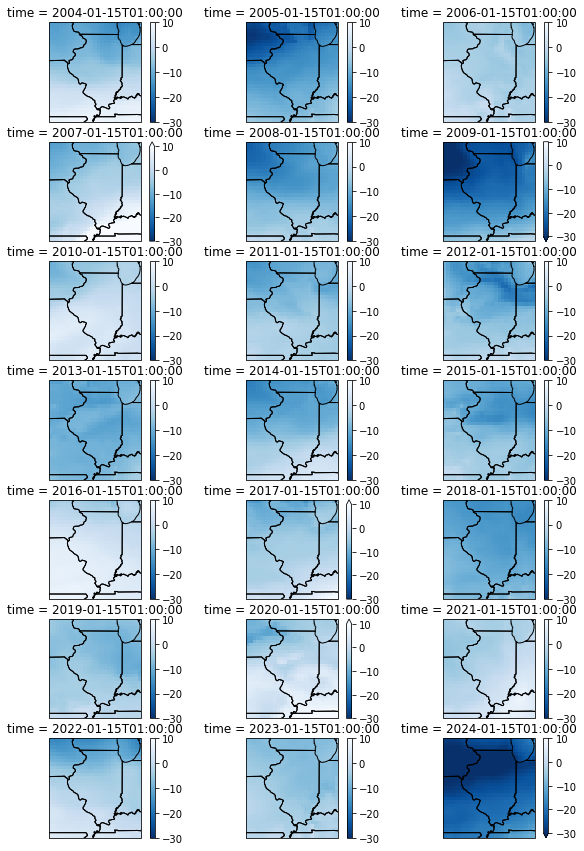

In [31]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    at.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r', vmin=-30, vmax=10)
    ax[i].add_feature(cfeature.STATES)
    i += 1

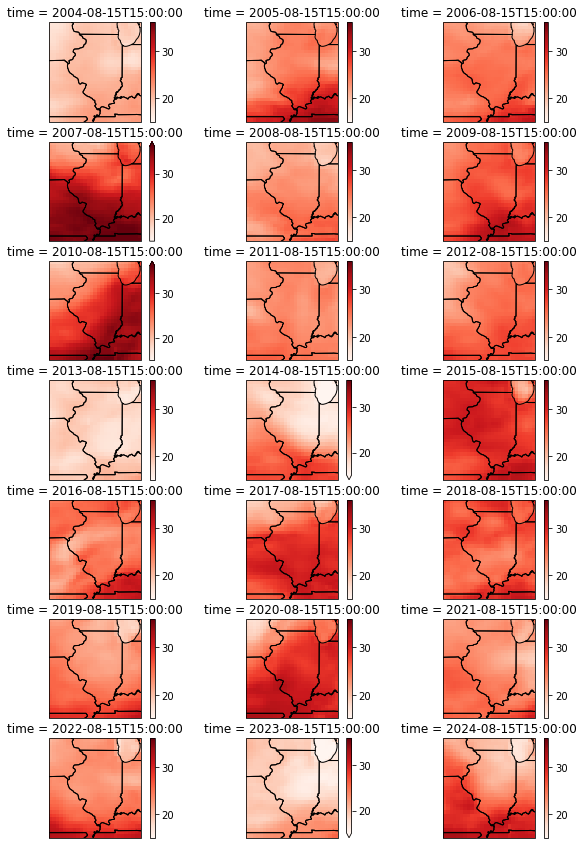

In [29]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    at.sel(time=str(year)+'-08-15T15:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Reds', vmin=15, vmax=36)
    ax[i].add_feature(cfeature.STATES)
    i += 1

# Normal Effective Temperature

In [10]:
def normal_effective_temperature(t2m, RH, wind_speed):
    """
    Calculates normal effective temperature for a DataArray
    
    Inputs:
        t2m - (DataArray) 2m air temperature (C)
        RH - (DataArray) 2m relative humidity (%)
        wind_speed - (DataArray) wind speed at 1.2 m above the ground (m/s)
    Output:
        net - (DataArray) normal effective temperature (C)
    """
    
    net = (37 - 
           ((37-t2m)/(0.68-(0.0014*RH)+(1/(1.76+(1.4*wind_speed**0.75)))))
           - (0.29*t2m*(1-(0.01*RH))))
    
    return net

In [12]:
net = normal_effective_temperature(t2m_C,RH*100,wind_mag)
net

<xarray.DataArray (time: 184104, lat: 29, lon: 27)>
array([[[-1.44456692e+01, -1.27164516e+01, -1.04366465e+01, ...,
         -1.27678642e+01, -1.22777119e+01, -1.08477192e+01],
        [-1.36595840e+01, -1.33468924e+01, -1.13447123e+01, ...,
         -1.18568420e+01, -1.18973503e+01, -1.12389936e+01],
        [-1.30987663e+01, -1.26885757e+01, -1.24131317e+01, ...,
         -1.12520103e+01, -1.13984928e+01, -1.12153263e+01],
        ...,
        [ 3.89439046e-01,  9.08458829e-02, -2.74112523e-01, ...,
          5.91192603e-01,  2.80864835e-01, -3.68875980e-01],
        [ 9.63458061e-01,  6.31702662e-01,  2.54469275e-01, ...,
          6.05407596e-01,  3.49338651e-01, -2.46571302e-01],
        [ 1.17342544e+00,  9.04694200e-01,  6.46170020e-01, ...,
          3.76283109e-01,  1.22425437e-01, -8.34698677e-02]],

       [[-1.30770044e+01, -1.18248692e+01, -1.18262825e+01, ...,
         -1.28348913e+01, -1.19951992e+01, -9.83774757e+00],
        [-1.23898907e+01, -1.31784658e+01, -1.39223242e+01, ...,
         -1.18244953e+01, -1.17347383e+01, -1.05174828e+01],
        [-1.17515612e+01, -1.23987932e+01, -1.34713259e+01, ...,
         -1.11397200e+01, -1.11964760e+01, -1.08452530e+01],
...
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 43.25 43.0 42.75 42.5 42.25 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 267.2 267.5 267.8 268.0 ... 273.0 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2004-01-01 ... 2024-12-31T23:00:00

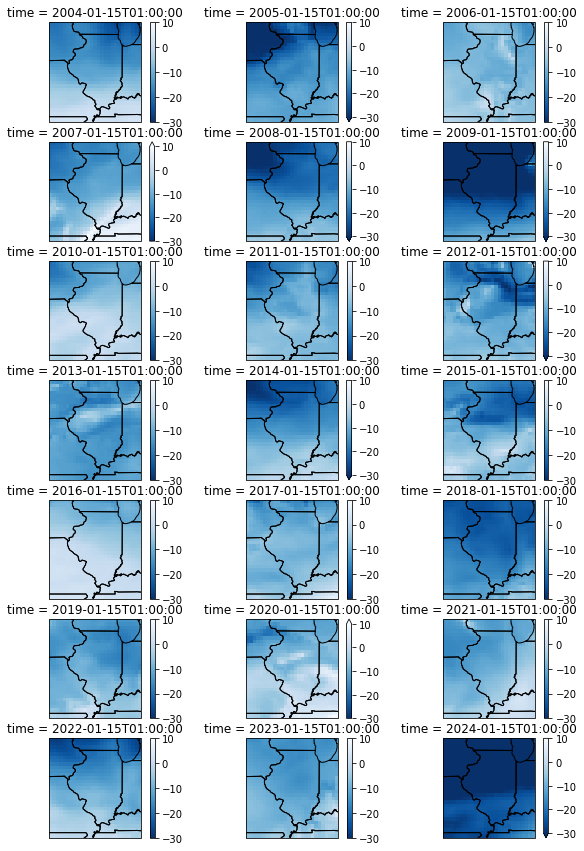

In [13]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    net.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r', vmin=-30, vmax=10)
    ax[i].add_feature(cfeature.STATES)
    i += 1

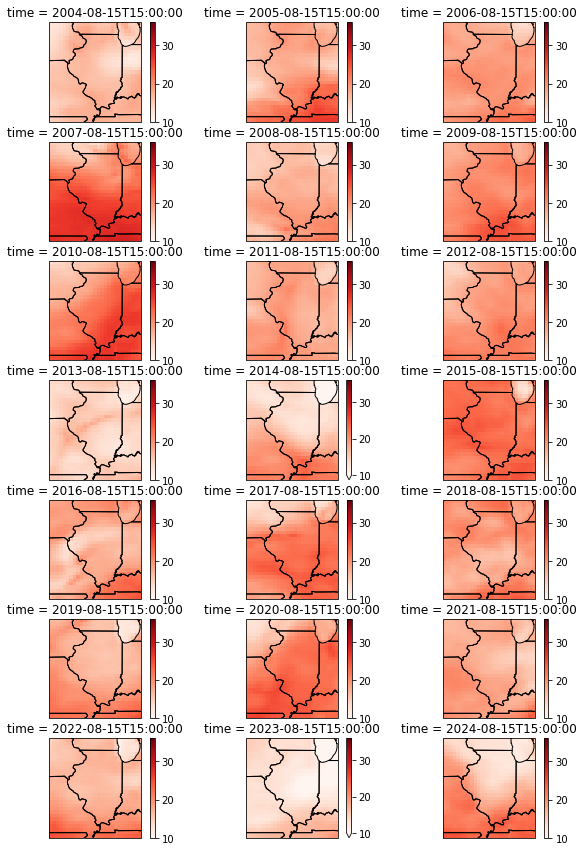

In [15]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    net.sel(time=str(year)+'-08-15T15:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Reds', vmin=10, vmax=36)
    ax[i].add_feature(cfeature.STATES)
    i += 1

# Humidex

In [16]:
def humidex(t2m, vp):
    """
    Calculate humidex for a DataArray
    
    Inputs:
        t2m (DataArray) - 2m air temperature in C
        vp (DataArray) - vapor pressure in hPa
        
    Output:
        humidex (DataArray) - Humidex in C
    """
    
    humidex = t2m + 0.5555*(vp - 10)
    
    return humidex

In [17]:
humidex_array = humidex(t2m_C, vapor_p)
humidex_array

<xarray.DataArray (time: 184104, lat: 29, lon: 27)>
array([[[-10.755112  , -10.02911   ,  -8.871715  , ...,  -1.4952772 ,
          -2.0578709 ,  -2.4393678 ],
        [-10.104075  ,  -9.892149  ,  -8.887753  , ...,  -1.0128038 ,
          -0.9553697 ,  -1.2025917 ],
        [ -9.5643425 ,  -9.331125  ,  -9.05571   , ...,  -0.6139512 ,
          -0.52745247,  -0.8000052 ],
        ...,
        [  7.032229  ,   6.8539886 ,   6.558204  , ...,   6.0054083 ,
           5.954229  ,   5.6349335 ],
        [  7.5767183 ,   7.4353037 ,   7.141159  , ...,   6.1649895 ,
           5.972164  ,   5.6214385 ],
        [  7.786094  ,   7.647884  ,   7.548739  , ...,   5.7007217 ,
           5.520439  ,   5.5566044 ]],

       [[-10.52669   ,  -9.952772  ,  -9.606285  , ...,  -1.7535005 ,
          -2.1325283 ,  -2.1616714 ],
        [ -9.881662  , -10.113866  , -10.021885  , ...,  -1.2213345 ,
          -1.1115558 ,  -1.0820575 ],
        [ -9.262569  ,  -9.425238  ,  -9.74943   , ...,  -0.78273416,
          -0.6541984 ,  -0.8791702 ],
...
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 43.25 43.0 42.75 42.5 42.25 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 267.2 267.5 267.8 268.0 ... 273.0 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2004-01-01 ... 2024-12-31T23:00:00

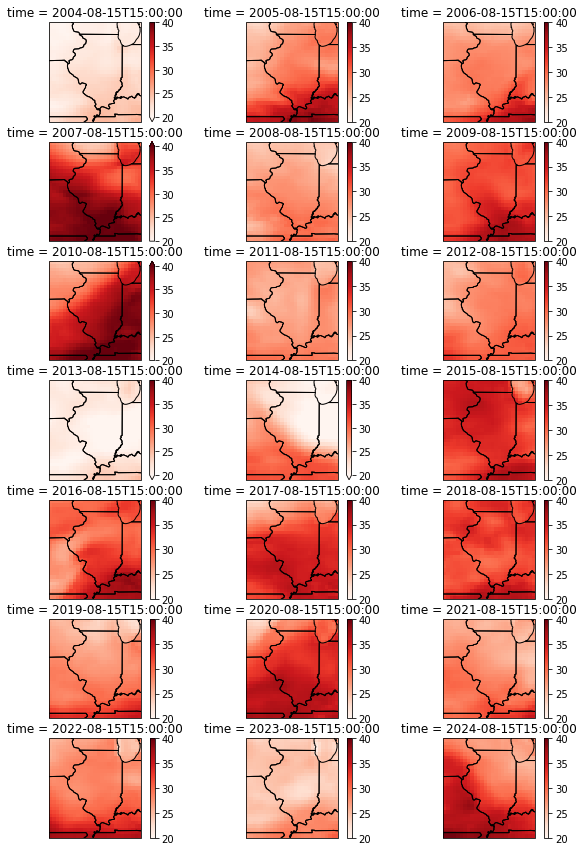

In [21]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    humidex_array.sel(time=str(year)+'-08-15T15:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Reds', vmin=20, vmax=40)
    ax[i].add_feature(cfeature.STATES)
    i += 1

# Wet Bulb Temperature

In [9]:
def wbt(RH, t2m):
    """
    https://journals.ametsoc.org/view/journals/apme/50/11/jamc-d-11-0143.1.xml 

    Returns wet bulb temperature for a DataArray

    Inputs:
        t2m - (DataArray) 2m air temperature (K)
        RH - (DataArray) 2m relative humidity (decimal)
    Outputs:
        T_w_K - (DataArray) 2m wet bulb temperature (K)
        
    """
    RH_p = RH * 100
    t_C = t2m - 273.15
    
    T_w = ( ( t_C * np.arctan2(0.151977*((RH_p + 8.313659)**(1/2)), 1) ) + 
              np.arctan2((t_C + RH_p), 1) - 
              np.arctan2((RH_p - 1.676331), 1) +
            ( 0.00391838 * (RH_p**(3/2)) * np.arctan2((0.023101*RH_p), 1) ) -
              4.686035
          )

    T_w_K = T_w + 273.15
    
    return T_w_K

In [10]:
wbt_array = wbt(RH, era5_2004_2024_t2m)
wbt_array

<xarray.DataArray (time: 184104, lat: 29, lon: 27)> Size: 577MB
array([[[264.48645, 265.0151 , 265.8298 , ..., 271.72318, 271.29245,
         271.14273],
        [264.99512, 265.13577, 265.8326 , ..., 272.05713, 272.1465 ,
         272.1025 ],
        [265.412  , 265.57022, 265.75934, ..., 272.32394, 272.43506,
         272.2793 ],
        ...,
        [278.13928, 278.0196 , 277.81082, ..., 276.95538, 276.99078,
         276.8305 ],
        [278.50165, 278.40842, 278.20126, ..., 277.16995, 277.08838,
         276.8935 ],
        [278.58887, 278.49875, 278.4832 , ..., 277.01865, 276.94653,
         276.85718]],

       [[264.63458, 265.06723, 265.3385 , ..., 271.55505, 271.2531 ,
         271.34518],
        [265.13278, 264.98068, 265.0714 , ..., 271.92755, 272.04886,
         272.19135],
        [265.60403, 265.50403, 265.2972 , ..., 272.22403, 272.3614 ,
         272.237  ],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], shape=(184104, 29, 27), dtype=float32)
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

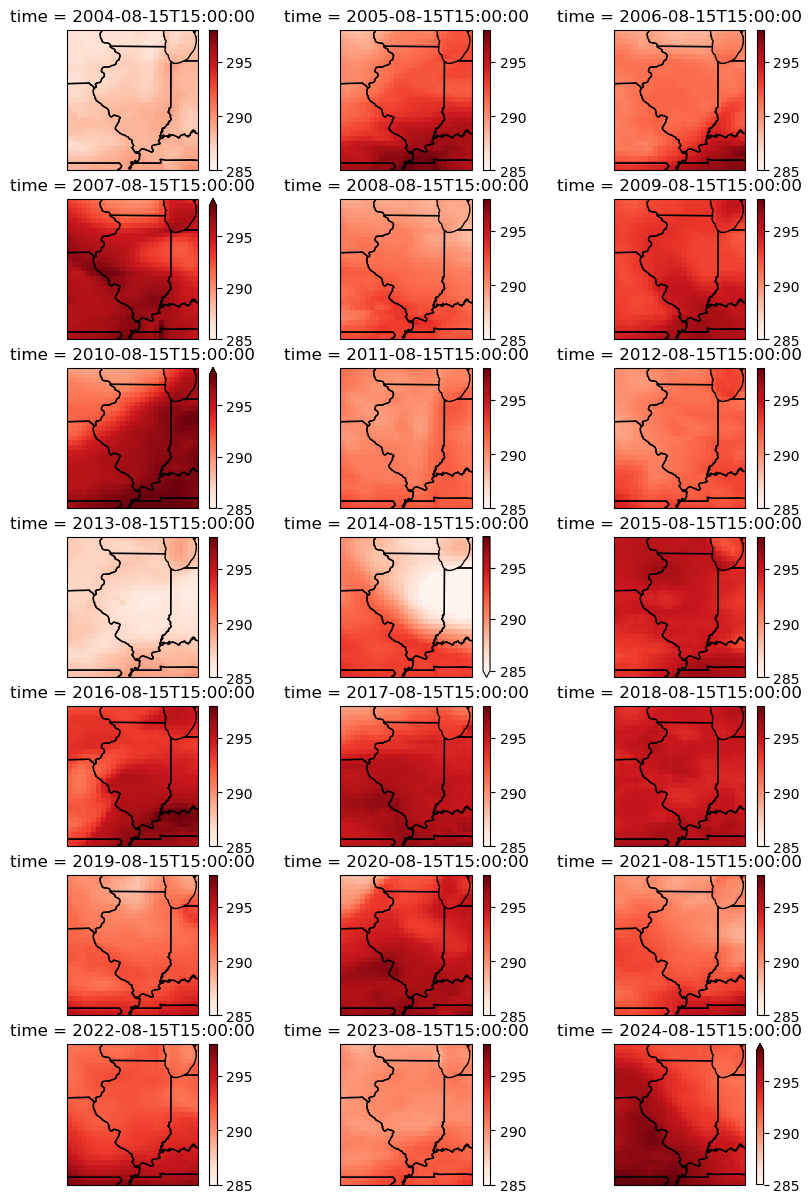

In [13]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    wbt_array.sel(time=str(year)+'-08-15T15:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Reds', vmin=285, vmax=298)
    ax[i].add_feature(cfeature.STATES)
    i += 1